In [85]:
import pandas as pd
import numpy as np
import os
from numpy import linalg as LNG
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "Dummy Data HSS.csv")
filepath

'd:\\1. Active Projects\\Data Analysis\\Github Repository\\simple-machine-learning\\classification\\digital_marketing_data_(dummy)\\Dummy Data HSS.csv'

In [87]:
marketing_data = pd.read_csv(filepath)
marketing_data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [88]:
marketing_data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [89]:
marketing_data.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [90]:
marketing_data["Influencer"] = marketing_data["Influencer"].astype("category")
marketing_data["Influencer"]

0        Mega
1        Mega
2        Mega
3        Mega
4       Micro
        ...  
4567    Micro
4568     Nano
4569    Micro
4570    Macro
4571    Micro
Name: Influencer, Length: 4572, dtype: category
Categories (4, object): ['Macro', 'Mega', 'Micro', 'Nano']

In [91]:
encoder = LabelEncoder()
Infl = marketing_data["Influencer"]
Infl_decoded = encoder.fit_transform(Infl)
marketing_data["Influencer"] = Infl_decoded
marketing_data["Influencer"] = marketing_data["Influencer"].astype("float")
print(encoder.classes_)

['Macro' 'Mega' 'Micro' 'Nano']


In [92]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   float64
 4   Sales         4566 non-null   float64
dtypes: float64(5)
memory usage: 178.7 KB


In [93]:
marketing_data.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [94]:
marketing_data.isna().sum().sum()

26

In [95]:
marketing_data.isnull().values.any()

True

**Null & Missing Data Treatment:**

***Treatment options:***
Omit: Delete/exclude respective value.
Ignore: Leave them be.
Iterate: Filling with stochastic regression iteration.

***Null***: We will **ignore** the null since we assume that it's a normal input (as 1 or 100).

***N/A (Missing Values)***: We will **omit** the N/A values since it can reduce the prediction robustness, we can actually iterate since the total of missing data is 26/4572 or 0.0011%. But since the data itself is not timebound (no time variables), stochastic regression iteration would be inefficient thus can provide bias.



In [96]:
marketing_data = marketing_data.dropna()
marketing_data
marketing_data.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [97]:
Target_Sales = [] #Declaring a new list
for i in marketing_data["Sales"]: 
    if i > 272:
        i = 1
        Target_Sales.append(i)
    else:
        i = 0
        Target_Sales.append(i)
marketing_data["Target_Sales"] = Target_Sales # A new column to hold our already categoried quality 
marketing_data

C:\Users\Addi\AppData\Local\Temp/ipykernel_6720/271928888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data["Target_Sales"] = Target_Sales # A new column to hold our already categoried quality


,TV,Radio,Social Media,Influencer,Sales,Target_Sales
0,16.0,6.566231,2.907983,1.0,54.732757,0
1,13.0,9.237765,2.409567,1.0,46.677897,0
2,41.0,15.886446,2.913410,1.0,150.177829,0
3,83.0,30.020028,6.922304,1.0,298.246340,1
4,15.0,8.437408,1.405998,2.0,56.594181,0
...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2.0,94.685866,0
4568,71.0,20.610685,6.545573,3.0,249.101915,0
4569,44.0,19.800072,5.096192,2.0,163.631457,0
4570,71.0,17.534640,1.940873,0.0,253.610411,0


In [98]:
regress_data = marketing_data.drop("Sales", axis=1)
regress_data

,TV,Radio,Social Media,Influencer,Target_Sales
0,16.0,6.566231,2.907983,1.0,0
1,13.0,9.237765,2.409567,1.0,0
2,41.0,15.886446,2.913410,1.0,0
3,83.0,30.020028,6.922304,1.0,1
4,15.0,8.437408,1.405998,2.0,0
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2.0,0
4568,71.0,20.610685,6.545573,3.0,0
4569,44.0,19.800072,5.096192,2.0,0
4570,71.0,17.534640,1.940873,0.0,0


In [99]:
sns.set()
fig = marketing_data.hist(figsize=(10,10), color='red', xlabelsize=6, ylabelsize=6)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

KeyboardInterrupt: 

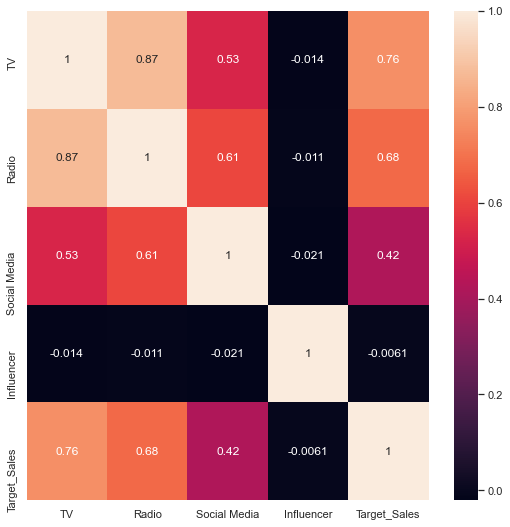

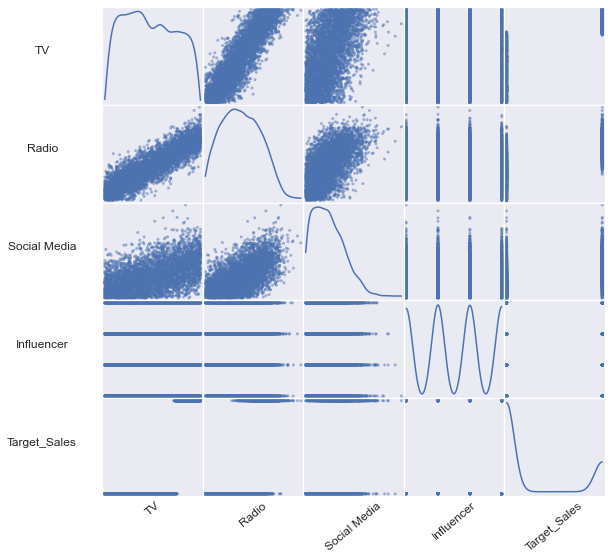

In [ ]:
plt.figure (figsize= (9,9)) #Heatmap Correlation Matrix
correlation_mat = regress_data.corr()
heatmap_mat = sns.heatmap(correlation_mat, annot=True)
plt.show() 

scatter = scatter_matrix(regress_data, figsize= (9,9), diagonal= "kde") #Scatterplot Matrix
[s.xaxis.label.set_rotation(40) for s in scatter.reshape(-1)] #Change Scatterplot Matrix Label Direction
[s.yaxis.label.set_rotation(0) for s in scatter.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in scatter.reshape(-1)] #May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in scatter.reshape(-1)]
[s.set_xticks(()) for s in scatter.reshape(-1)] #Hide all ticks
[s.set_yticks(()) for s in scatter.reshape(-1)]
plt.show()



In [ ]:
x = regress_data.drop("Target_Sales", axis =1 ) #Declaring independent variable i.e x
y = regress_data["Target_Sales"] #Declaring Target variable i.e y

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.25, random_state = 345) #Splitting our data into train and test dataset
logit = LogisticRegression() #select the algorithm
logit.fit(x_train,y_train) # we fit the algorithm with the training data and the training output


LogisticRegression()

In [ ]:
y_hat = logit.predict(x_test)
acc = metrics.accuracy_score(y_hat,y_test)# To know the accuracy
acc

0.9920844327176781

In [ ]:
logit.intercept_ # Intercept of the regression

array([-9.84600487])

In [ ]:
logit.coef_ # coefficients of the variables / features 

array([[11.22520665,  0.50563964, -0.20750064, -0.02632472]])

In [ ]:
result = pd.DataFrame(data = x.columns, columns = ["Marketing Channels"])
result["Weight"] = np.transpose(logit.coef_)
result["Odds"] = np.exp(np.transpose(logit.coef_))
result

,Marketing Channels,Weight,Odds
0,TV,11.225207,74997.244717
1,Radio,0.505640,1.658046
2,Social Media,-0.207501,0.812613
3,Influencer,-0.026325,0.974019


In [ ]:
confucius = confusion_matrix(y_hat,y_test)
confucius

array([[846,   3],
       [  6, 282]], dtype=int64)

In [100]:
confucius_df = pd.DataFrame(confucius)
confucius_df.columns = ['Predicted 0','Predicted 1']
confucius_df = confucius_df.rename(index={0: 'Actual 0',1:'Actual 1'})
confucius_df

,Predicted 0,Predicted 1
Actual 0,846,3
Actual 1,6,282
